In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple

In [3]:
DIMENSIONS: Tuple = (5, 15, 30)

In [5]:
def generate_thresholds_F(dimensions):
    """Generate thresholds for function evaluations."""
    thresholds = []
    w = 0
    while len(thresholds) < 41:  # 41 thresholds
        threshold = dimensions * (10 ** w)
        thresholds.append(threshold if abs(threshold - round(threshold)) > 1e-7 else round(threshold))
        w += 0.1
    return thresholds

In [6]:
def generate_thresholds_J():
    """Generate thresholds for solution quality."""
    thresholds = []
    w = -8
    while len(thresholds) < 51:  # 51 thresholds
        threshold = 10 ** w
        thresholds.append(threshold if abs(threshold - round(threshold)) > 1e-9 else round(threshold))
        w += 0.2
    return thresholds

In [7]:
def count_exceeding_thresholds(value, quality_thresholds):
    """Count the number of quality thresholds exceeded by a value."""
    return sum(1 for t in reversed(quality_thresholds) if value < t)

In [8]:
def process_ecdf(raw_data_path, output_path, dimensions):
    # Generate thresholds
    eval_thresholds = generate_thresholds_F(dimensions)
    quality_thresholds = generate_thresholds_J()

    # Load raw data
    df = pd.read_excel(raw_data_path, sheet_name=f"rosenbrock_{dimensions}")
    num_runs = df.shape[1]

    # Prepare the ECDF output
    ecdf_data = []

    # Iterate through each evaluation threshold
    for eval_threshold in eval_thresholds:
        # Aggregate the number of thresholds crossed for each column (run)
        eval_results = []
        for run in df.columns:
            # Get the fitness values up to the current evaluation threshold
            fitness_values = df[run][:int(eval_threshold)].to_list()
            best_value = min(fitness_values) if fitness_values else float('inf')

            # Count the number of quality thresholds exceeded
            eval_results.append(count_exceeding_thresholds(best_value, quality_thresholds))
        
        # Write ECDF data row
        ecdf_data.append(eval_results)
    
    # Convert results to DataFrame
    ecdf_df = pd.DataFrame(ecdf_data, columns=[f"Run_{i+1}" for i in range(num_runs)])
    
    # Save the processed ECDF data
    ecdf_df.to_csv(output_path, index=False, header=True)
    print(f"ECDF data saved to {output_path}")

In [20]:
def plot_ecdf(data_pathm, dim):
    # Load processed ECDF data
    ecdf_data = pd.read_csv(data_path)

    # Plot ECDF for each quality threshold
    plt.figure(figsize=(10, 6))
    for col in ecdf_data.columns:
        plt.plot(ecdf_data[col], label=col)

    # Labeling
    plt.xlabel('Function Evaluation Threshold')
    plt.ylabel('Cumulative Count (Exceeding Quality Threshold)')
    plt.title('Empirical Cumulative Distribution Function (ECDF)')
    plt.legend(title='Runs', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'{dim}.png')

    # Show plot
    plt.show()

In [10]:
# Process raw data for all dimensions:
for dim in DIMENSIONS:
    raw_data_path = "rosenbrock_results.xlsx"
    output_path = f"ecdf_data_dim_{dim}.csv"
    print(f"Processing ECDF for dimension {dim}...")
    process_ecdf(raw_data_path, output_path, dim)

Processing ECDF for dimension 5...
ECDF data saved to ecdf_data_dim_5.csv
Processing ECDF for dimension 15...
ECDF data saved to ecdf_data_dim_15.csv
Processing ECDF for dimension 30...
ECDF data saved to ecdf_data_dim_30.csv


Plotting ECDF for dimension 5...


/tmp/ipykernel_42605/1657899338.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


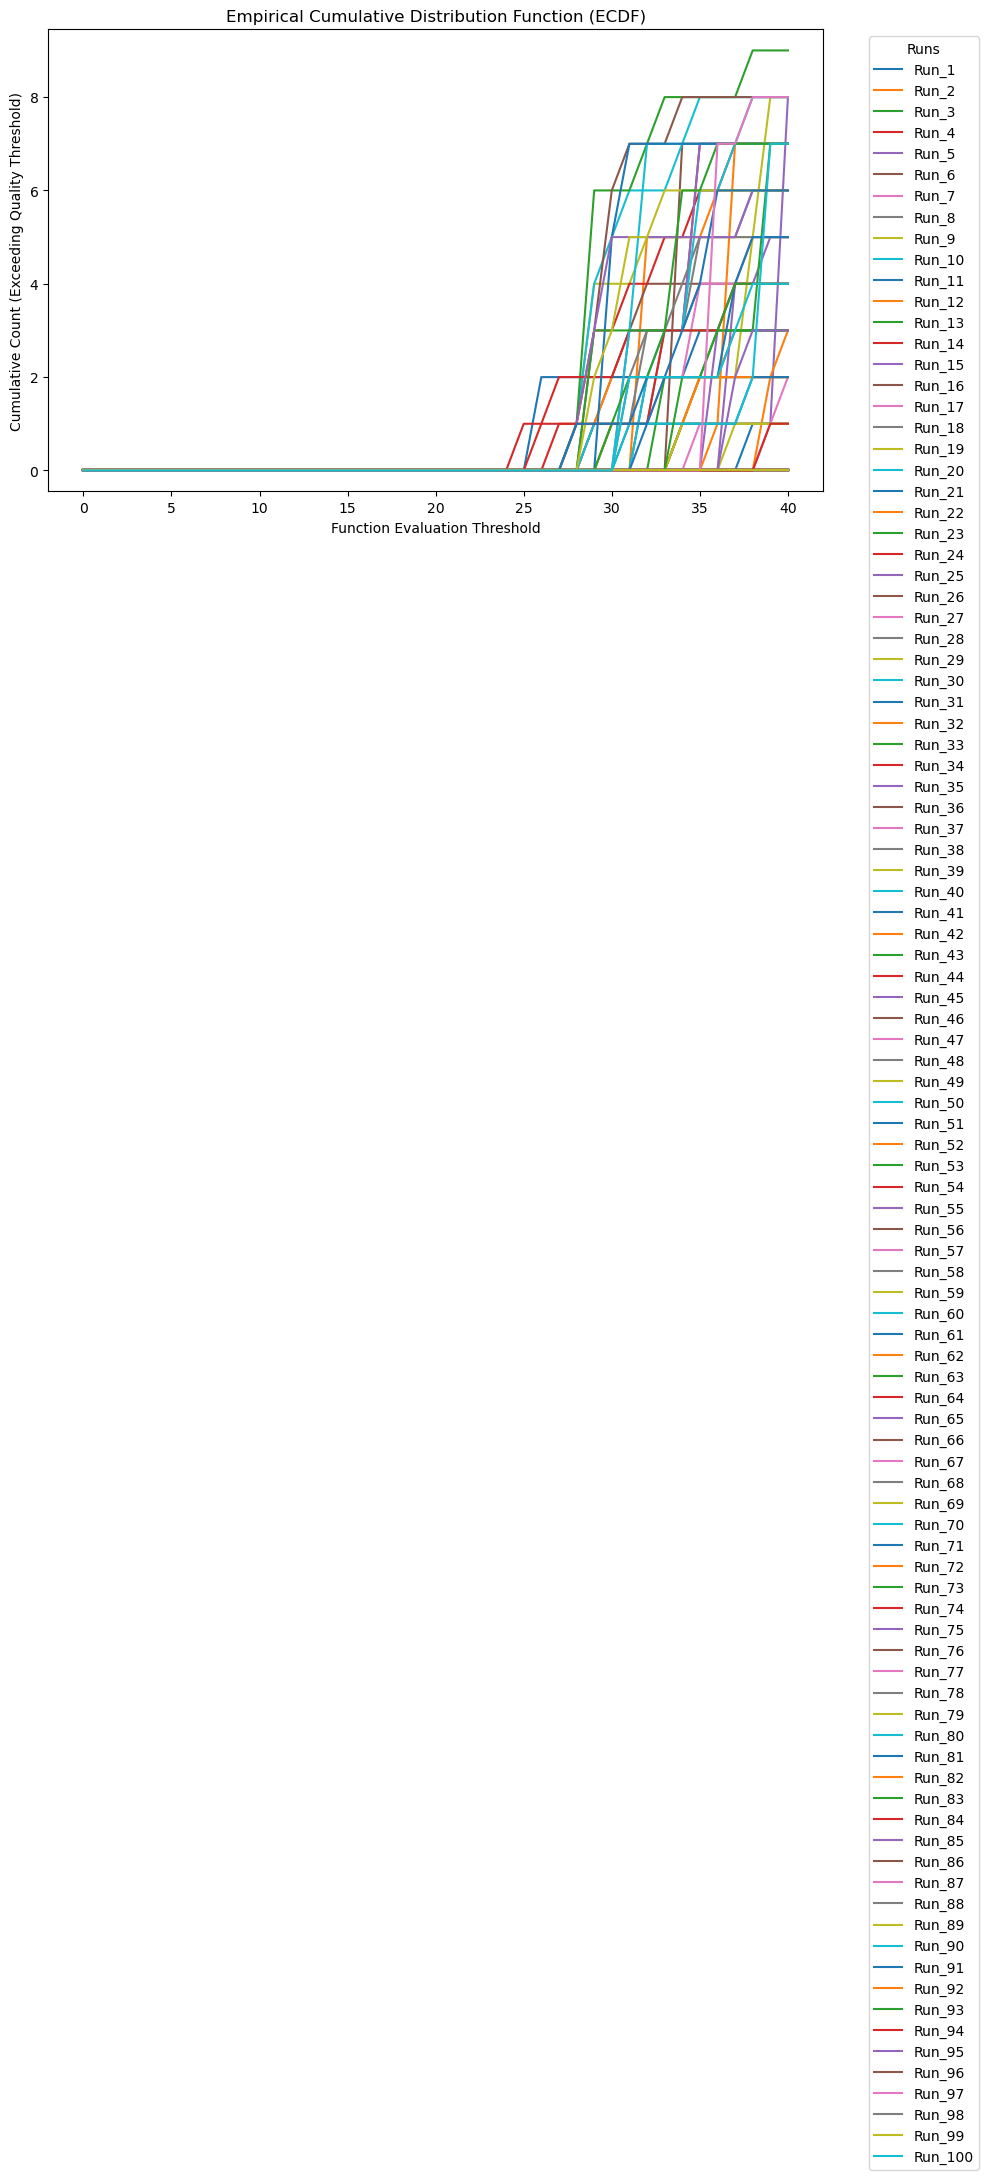

Plotting ECDF for dimension 15...


/tmp/ipykernel_42605/1657899338.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

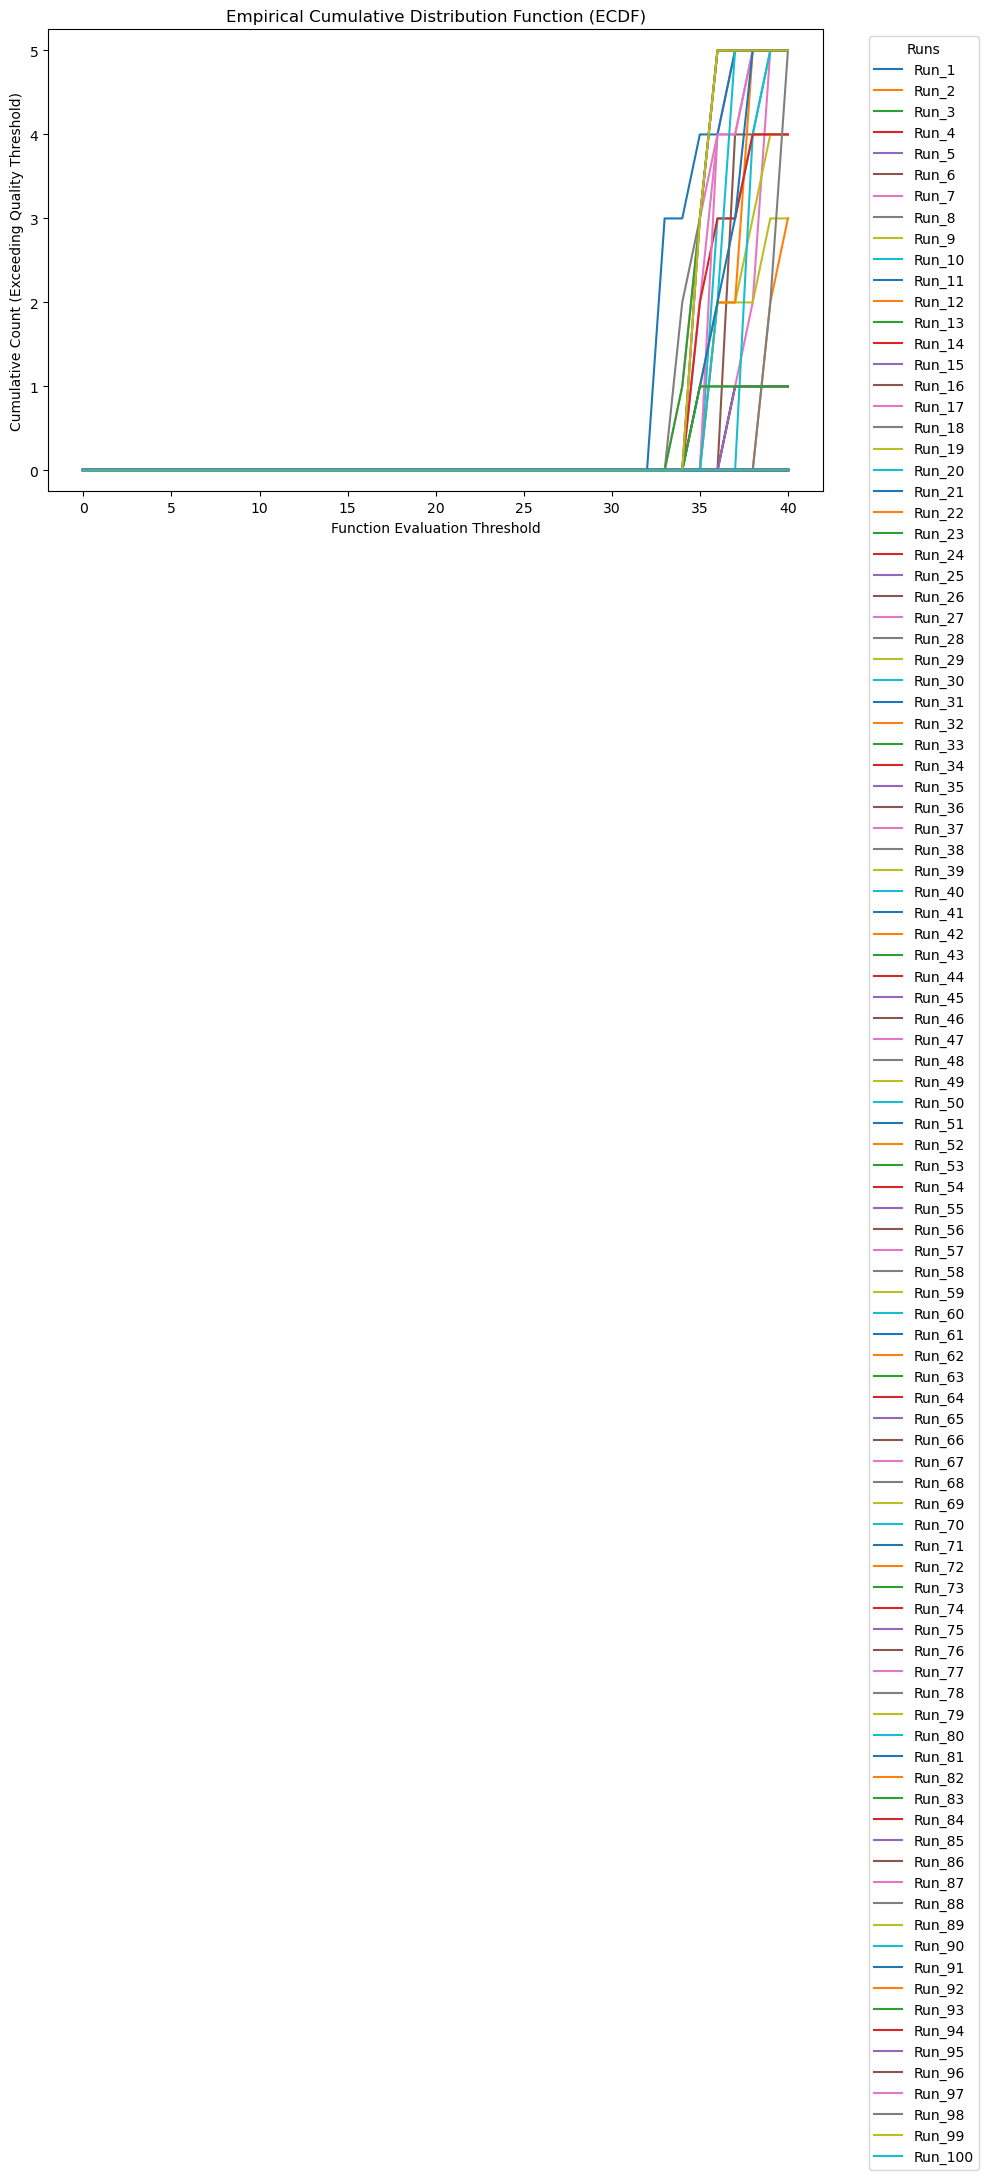

Plotting ECDF for dimension 30...


/tmp/ipykernel_42605/1657899338.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

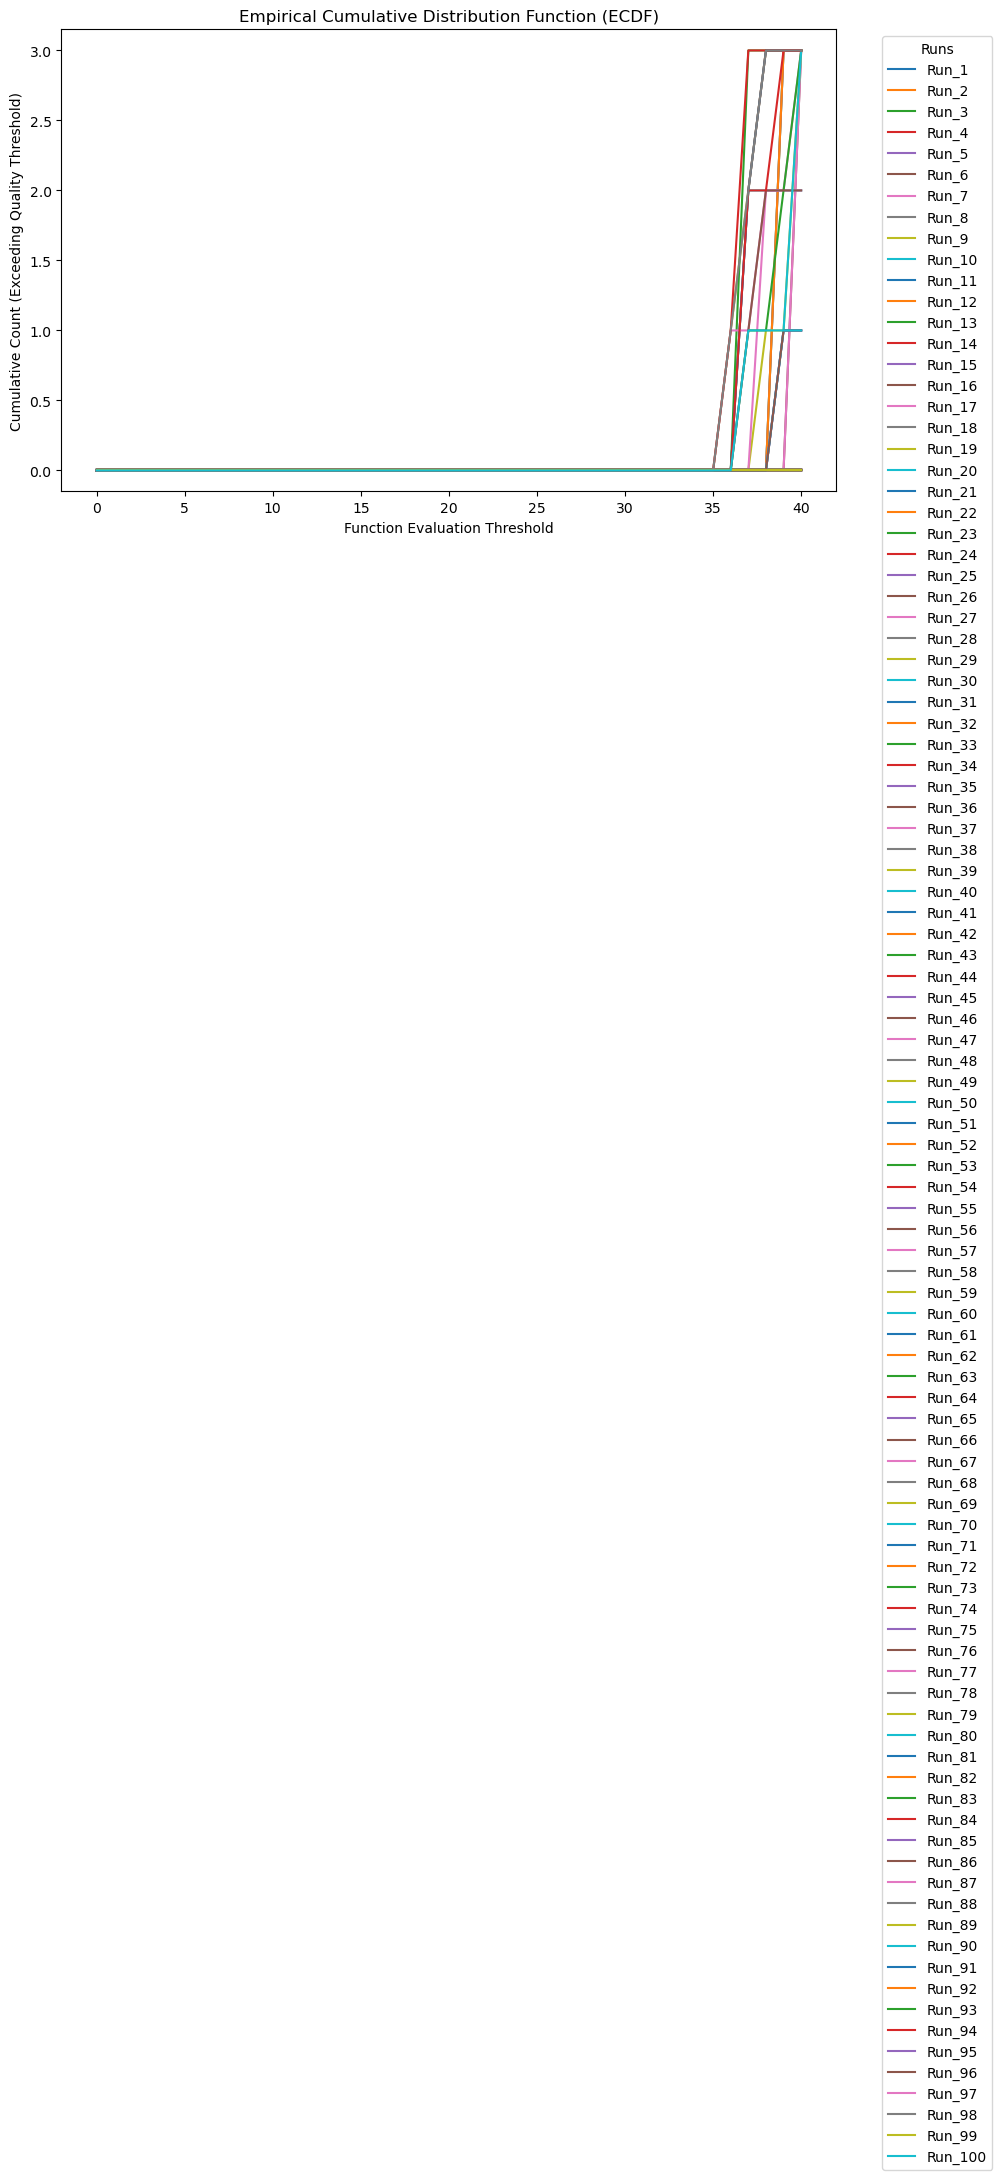

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot ECDF for each dimension
for dim in DIMENSIONS:
    data_path = f"ecdf_data_dim_{dim}.csv"
    print(f"Plotting ECDF for dimension {dim}...")
    plot_ecdf(data_path, dim)
    plt.tight_layout()
    plt.savefig('ResultFig')